In [50]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#just for the notebook
%run implementations
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [51]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [52]:
tX

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [53]:
tX

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [54]:
#replace -999 with nan
tX = replace_999_with_nan(tX)
tX

array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       ...,
       [105.457,  60.526,  75.839, ...,     nan,     nan,  41.992],
       [ 94.951,  19.362,  68.812, ...,     nan,     nan,   0.   ],
       [    nan,  72.756,  70.831, ...,     nan,     nan,   0.   ]])

In [56]:
#substract mean and divide by std, replace Nans with mean
tX = normalize(tX)

In [57]:
#Split data according to ration
x_train, y_train, x_test, y_test = split_data(tX, y, 0.8, seed=1)

In [58]:
#Make sure there is no nans
np.isnan(tX).any()

False

In [59]:
# Append y values as column to later divide y into buckets corresponding with x values
train = np.column_stack((x_train, y_train))

In [60]:
# Split training x into buckets
buckets = get_buckets(train)

In [61]:
initial_weights = np.zeros(x_train.shape[1])

In [ ]:
# Least squares
#w , loss = least_squares(y_train,x_train)

# Least squares GD
#w , loss = least_squares_GD(y_train,x_train,initial_weights,200,0.01)

# Least squares SGD
#w, loss = least_squares_SGD(y_train,x_train,initial_weights,200,0.01)

# Ridge regression
w,loss = ridge_regression(y_train,x_train,0.0001)

# Logistic regression
#w,loss = logistic_regression(y_train,x_train,initial_weights,400,0.0001)

# reg logistic regression
#w,loss = reg_logistic_regression(y_train,x_train,0.001,initial_weights,100,0.0001)

In [ ]:
w

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
weights = w
weights.shape

In [ ]:
OUTPUT_PATH = '../data/sub.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

# Computing score on validation set

In [ ]:
weights = w
y_pred = predict_labels(weights,x_test)

In [ ]:
w

In [ ]:
# Compute accuracy 
true_positive = 0
false_positive = 0 
true_negative = 0
false_negative = 0

testing_length = y_test.shape[0]
for i in range(testing_length):      
    if (y_test[i] == y_pred[i]) and (y_pred[i]==1):        
        true_positive += 1
    if (y_test[i] == y_pred[i]) and (y_pred[i]==-1):
        true_negative +=1        
    if (y_test[i] != y_pred[i]) and (y_pred[i]==-1):    
        false_negative += 1
    if (y_test[i] != y_pred[i]) and (y_pred[i]==1):
        false_positive +=1
        
        
precision = true_positive/float(true_positive+false_positive)
recall =true_positive/float(true_positive + false_negative)
F=2 *(precision*recall)/float(precision+recall)        
    

print('Train accuracy: ',  ((true_positive+true_negative)/float(testing_length))*100.0)
print("precision : ", precision)
print("recall : ",recall)
print("F1 score : ",F)

        

In [62]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [63]:
from implementations import cross_validation
def cross_validation_demo():
    seed = 50
    degree = 0
    k_fold = 10
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        print("gamma",lambda_)
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation(y, tX, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
            
        print(np.mean(rmse_tr_tmp))
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)


gamma 0.0001
0.9951831806978536
gamma 0.00013738237958832623
0.99343932833901
gamma 0.00018873918221350977
0.9910917754235818
gamma 0.0002592943797404667
0.987954311660066
gamma 0.0003562247890262444
0.9838013807696389
gamma 0.0004893900918477494
0.9783737812872273
gamma 0.0006723357536499335
0.9713967806433921
gamma 0.0009236708571873865
0.9626166753833569
gamma 0.0012689610031679222
0.9518606930877305
gamma 0.0017433288221999873
0.9391217481316234
gamma 0.002395026619987486
0.9246647950030426
gamma 0.0032903445623126675
0.9091410027223941
gamma 0.004520353656360241
0.8936558486515697
gamma 0.006210169418915616
0.8796499568125737
gamma 0.008531678524172805
0.8684346244503356
gamma 0.011721022975334805
0.8605218608839056
gamma 0.01610262027560939
0.8553296044445948
gamma 0.02212216291070448
0.8516593964291527
gamma 0.03039195382313198
0.8484942464010494
gamma 0.041753189365604
0.8453687696109599
gamma 0.05736152510448681
0.8422308129001767
gamma 0.07880462815669913
0.839197789286693
ga

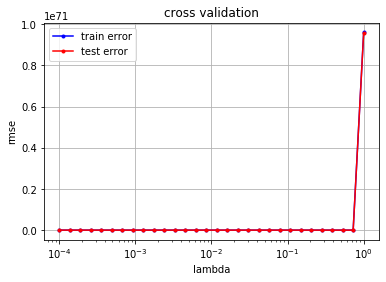

In [64]:
cross_validation_demo()